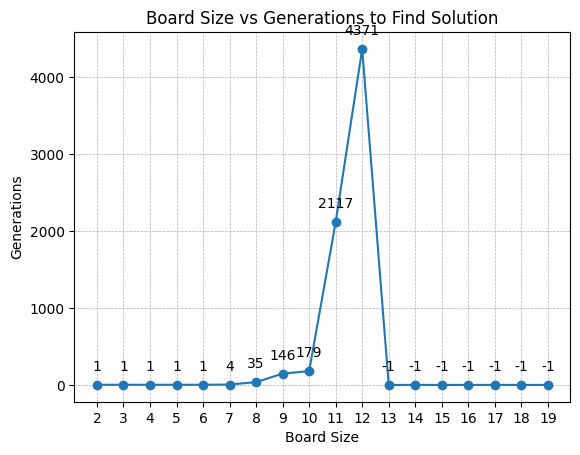

In [4]:
import random
import matplotlib.pyplot as plt

def generate_board(size):
    return [random.randint(1, size+1) for _ in range(size)]

def fitness(board):
    conflicts = 0
    size = len(board)
    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j] or abs(i - j) == abs(board[i] - board[j]):
                conflicts += 1
    return size - conflicts  # More conflicts, lower fitness

def select_parents(population):
    tournament_size = 3
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_parents.append(max(tournament, key=fitness))
    return selected_parents

def crossover(parent1, parent2):
    size = len(parent1)
    if size == 1:
        return parent1, parent2  # No crossover for size 1
    crossover_point = random.randint(1, size - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(board, mutation_rate):
    size = len(board)
    for i in range(size):
        if random.random() > mutation_rate:
            swap_position = random.randint(1, size - 1)   
            board[i], board[swap_position] = board[swap_position], board[i]
    return board

def run_genetic_algorithm(size, population_size, generations, mutation_rate):
    population = [generate_board(size) for _ in range(population_size)]
    prev_fitness = 0  # prev_fitness (fitness of the last generation)
    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        parents = select_parents(population)
        offspring = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            offspring.extend([child1, child2])
        population[:population_size] = offspring
        best_solution = max(population, key=fitness)
        current_fitness = fitness(best_solution)
        if current_fitness == size:
            return generation + 1  # Return the generation when a solution is found
    return -1  # Return -1 if no solution is found

# Plotting the graph
board_sizes = list(range(2, 20))
generations_found = []

for size in board_sizes:
    generation_found = run_genetic_algorithm(size=size, population_size=1000, generations=10000, mutation_rate=0.8)
    generations_found.append(generation_found)

plt.plot(board_sizes, generations_found, marker='o')
plt.title('Board Size vs Generations to Find Solution')
plt.xlabel('Board Size')
plt.ylabel('Generations')
plt.xticks(board_sizes)
for x, y in zip(board_sizes, generations_found):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

In [3]:
import random
import matplotlib.pyplot as plt

def generate_board(size):
    return [random.randint(1, size+1) for _ in range(size)]

def fitness(board):
    conflicts = 0
    size = len(board)
    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j] or abs(i - j) == abs(board[i] - board[j]):
                conflicts += 1
    return size - conflicts  # More conflicts, lower fitness

def select_parents(population):
    tournament_size = 3
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_parents.append(max(tournament, key=fitness))
    return selected_parents

def crossover(parent1, parent2, cross_prob):
    if random.random() >= cross_prob:
      size = len(parent1)
      if size == 1:
          return parent1, parent2  # No crossover for size 1
      crossover_point = random.randint(1, size - 1)
      child1 = parent1[:crossover_point] + parent2[crossover_point:]
      child2 = parent2[:crossover_point] + parent1[crossover_point:]
      return child1, child2
    else:
      return parent1, parent2

def mutate(board, mutation_rate):
    size = len(board)
    for i in range(size):
        if random.random() > mutation_rate:
            swap_position = random.randint(1, size - 1)
            board[i], board[swap_position] = board[swap_position], board[i]
    return board

def run_genetic_algorithm(size, population_size, generations, mutation_rate, death_rate):
    population = [generate_board(size) for _ in range(population_size)]
    prev_fitness = 0  # prev_fitness (fitness of the last generation)
    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        parents = select_parents(population)
        offspring = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child1, child2 = crossover(parent1, parent2, 0.6)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            offspring.extend([child1, child2])
        population[:population_size] = offspring
        population = sorted(population, key=fitness, reverse=True)
        best_solution = max(population, key=fitness)
        current_fitness = fitness(best_solution)
        if current_fitness == size:
            return generation + 1  # Return the generation when a solution is found
    return -1  # Return -1 if no solution is found

# Plotting the graph
board_sizes = list(range(2, 20))
generations_found = []

for size in board_sizes:
    generation_found = run_genetic_algorithm(size=size, population_size=100, generations=500, mutation_rate=0.8, death_rate=3)
    generations_found.append(generation_found)

plt.plot(board_sizes, generations_found, marker='o')
plt.title('Board Size vs Generations to Find Solution')
plt.xlabel('Board Size')
plt.ylabel('Generations')
plt.xticks(board_sizes)
for x, y in zip(board_sizes, generations_found):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [137]:
import random

def generate_board(size):
    return [random.randint(1, size+1) for _ in range(size)]

def fitness(board):
    conflicts = 0
    size = len(board)
    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j] or abs(i - j) == abs(board[i] - board[j]):
                conflicts += 1
    return size - conflicts  # More conflicts, lower fitness

def select_parents(population):
    tournament_size = 3
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_parents.append(max(tournament, key=fitness))
    return selected_parents

def crossover(parent1, parent2):
    size = len(parent1)
    crossover_point = random.randint(1, size - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(board, mutation_rate):
    size = len(board)
    for i in range(size):
        if random.random() > mutation_rate:
            swap_position = random.randint(1, size - 1)   
            board[i], board[swap_position] = board[swap_position], board[i]
    return board

def genetic_algorithm(size, population_size, generations, mutation_rate):
    population = [generate_board(size) for _ in range(population_size)]
    prev_fitness = 0  # prev_fitness (fitness of last generation)
    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        parents = select_parents(population)
        offspring = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            offspring.extend([child1, child2])
        population[:population_size] = offspring
        best_solution = max(population, key=fitness)
        current_fitness = fitness(best_solution)
        if current_fitness > prev_fitness:
            print(f"Generation {generation+1}: Best Fitness - {current_fitness}")
            prev_fitness = current_fitness  # Update prev_fitness
        if current_fitness == size:
            print("Solution Found!")
            print("Board Configuration:", best_solution)
            break
    if current_fitness != size:
        print("No solution found.")
genetic_algorithm(size=8, population_size=100, generations=50, mutation_rate=0.8)

Generation 1: Best Fitness - 6
Generation 5: Best Fitness - 7
Generation 18: Best Fitness - 8
Solution Found!
Board Configuration: [6, 8, 3, 1, 7, 5, 2, 9]


In [134]:
import random

def generate_sequence(size, max_value):
    return [random.randint(1, max_value) for _ in range(size)]

def fitness(sequence):
    max_value = max(sequence)
    return max_value ** 2

def select_parents(population):
    tournament_size = 3
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        selected_parents.append(max(tournament, key=fitness))
    return selected_parents

def crossover(parent1, parent2):
    size = len(parent1)
    crossover_point = random.randint(1, size - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(sequence, mutation_rate, max_value):
    size = len(sequence)
    for i in range(size):
        if random.random() < mutation_rate:
            sequence[i] = random.randint(1, max_value)
    return sequence

def genetic_algorithm(size, population_size, generations, mutation_rate, max_value):
    population = [generate_sequence(size, max_value) for _ in range(population_size)]
    prev_fitness = 0  # prev_fitness (fitness of last generation)
    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        parents = select_parents(population)
        offspring = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate, max_value)
            child2 = mutate(child2, mutation_rate, max_value)
            offspring.extend([child1, child2])
        population[:population_size] = offspring
        best_solution = max(population, key=fitness)
        current_fitness = fitness(best_solution)
        print(f"Generation {generation+1}: Best Fitness - {current_fitness}")
        if current_fitness == max_value**2:
            print("Maximum X^2 value reached!")
            print("Sequence:", best_solution)
            break
    if current_fitness != max_value**2:
        print("Maximum X^2 value not reached.")

# Example usage:
genetic_algorithm(size=10, population_size=6, generations=100, mutation_rate=0.1, max_value=100)

Generation 1: Best Fitness - 9409
Generation 2: Best Fitness - 9409
Generation 3: Best Fitness - 9409
Generation 4: Best Fitness - 9801
Generation 5: Best Fitness - 9801
Generation 6: Best Fitness - 9801
Generation 7: Best Fitness - 9801
Generation 8: Best Fitness - 9801
Generation 9: Best Fitness - 9801
Generation 10: Best Fitness - 9801
Generation 11: Best Fitness - 9801
Generation 12: Best Fitness - 9801
Generation 13: Best Fitness - 9801
Generation 14: Best Fitness - 9801
Generation 15: Best Fitness - 9801
Generation 16: Best Fitness - 9801
Generation 17: Best Fitness - 9801
Generation 18: Best Fitness - 9801
Generation 19: Best Fitness - 9801
Generation 20: Best Fitness - 9801
Generation 21: Best Fitness - 9801
Generation 22: Best Fitness - 9801
Generation 23: Best Fitness - 9801
Generation 24: Best Fitness - 9801
Generation 25: Best Fitness - 9801
Generation 26: Best Fitness - 9801
Generation 27: Best Fitness - 9801
Generation 28: Best Fitness - 9801
Generation 29: Best Fitness -